In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
data = pd.read_csv("all_stocks_5yr.csv")

In [3]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
data.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [5]:
# Select a particular stock here and the rest of the program will only work on that particular stock for now
# To be edited to take all the stocks into consideration for final hypothesis.

data = data[data.Name == "WEC"]

In [6]:
data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,52.295683,52.687828,51.907045,52.323340,1.775573e+06
std,8.446096,8.472741,8.391912,8.447156,7.896705e+05
min,39.370000,39.830000,39.040000,39.180000,4.864490e+05
25%,44.670000,45.045000,44.390000,44.695000,1.285024e+06
50%,50.680000,51.200000,50.090000,50.740000,1.607661e+06
75%,59.840000,60.315000,59.345000,59.970000,2.052064e+06
max,69.620000,70.090000,69.110000,69.530000,1.063556e+07


In [7]:
log_diff = np.log(1 + data.close.pct_change()) # log of percentage change between the current and a prior element.
mean = log_diff.mean() # Mean of the logarithmich return
variance = log_diff.var() # Variance of the logarithic return
trend = mean - (0.5 * variance) # Trend of the logarithmic return
std_dev = log_diff.std() # Standard deviation of the log return


p_interval = 250 # Forecasting almost a fifth of the original points available.
forecast_count = 10 # To obtain 10 different forecast

p_noise = np.exp(trend + std_dev * norm.ppf(np.random.rand(p_interval, forecast_count)))
# When we multiply this with the stock price at p point, then we can obtain stock price at p+1 point.

In [8]:
# The last closing price will become the initial stock price for prediction of the next 250 points.

S0 = data.close.iloc[-1]
S0

59.86

In [9]:
# Creating an empty matrix same size as p_noise.

price_list = np.zeros_like(p_noise)
price_list[0] = S0
price_list

array([[59.86, 59.86, 59.86, ..., 59.86, 59.86, 59.86],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [10]:
# Forecasting the next 250 points using noise calculated before, 10 (forecast_count) times.

for p in range(1, p_interval):
    price_list[p] = price_list[p - 1] * p_noise[p]
    
price_list = pd.DataFrame(price_list)
price_list['close'] = price_list[0]

In [11]:
price_list.head()

,0,1,2,3,4,5,6,7,8,9,close
0,59.860000,59.860000,59.860000,59.860000,59.860000,59.860000,59.860000,59.860000,59.860000,59.860000,59.860000
1,59.579833,59.961562,59.675808,59.822250,60.196609,60.103466,58.978567,59.599969,59.108233,59.872153,59.579833
2,60.560213,60.241862,59.895144,59.733105,59.729670,60.102064,59.185747,59.238615,59.003006,60.144584,60.560213
3,60.005487,59.959738,60.218975,58.410618,59.627346,59.991507,59.180351,58.475063,59.254650,61.338212,60.005487
4,60.294556,60.259496,60.810332,58.107288,59.822368,59.151752,59.064269,59.482376,60.350543,62.080026,60.294556


In [12]:
price_list.tail()

,0,1,2,3,4,5,6,7,8,9,close
245,63.468965,76.618501,57.020941,75.086979,73.220053,60.332990,58.920617,53.364910,61.669242,60.032274,63.468965
246,63.402770,77.720191,56.966661,74.646928,73.748609,60.098005,59.146299,54.512766,61.606608,59.348853,63.402770
247,62.492575,79.492061,57.966986,73.526974,74.492597,60.397525,58.562530,54.110270,61.765476,60.407961,62.492575
248,61.436442,78.399708,57.578345,72.592225,74.239252,60.432696,58.632611,54.247503,61.531840,59.888203,61.436442
249,61.294193,79.073494,57.371027,73.645715,74.646376,61.387890,59.146594,54.841090,61.644900,60.515879,61.294193


In [13]:
close = data.close
close = pd.DataFrame(close)
mc_forecast = pd.concat([close, price_list], sort=True)

In [14]:
mc_forecast.head()

,close,0,1,2,3,4,5,6,7,8,9
590152,40.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590153,40.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590154,39.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590155,39.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590156,39.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
mc_forecast.tail()

,close,0,1,2,3,4,5,6,7,8,9
245,63.468965,63.468965,76.618501,57.020941,75.086979,73.220053,60.332990,58.920617,53.364910,61.669242,60.032274
246,63.402770,63.402770,77.720191,56.966661,74.646928,73.748609,60.098005,59.146299,54.512766,61.606608,59.348853
247,62.492575,62.492575,79.492061,57.966986,73.526974,74.492597,60.397525,58.562530,54.110270,61.765476,60.407961
248,61.436442,61.436442,78.399708,57.578345,72.592225,74.239252,60.432696,58.632611,54.247503,61.531840,59.888203
249,61.294193,61.294193,79.073494,57.371027,73.645715,74.646376,61.387890,59.146594,54.841090,61.644900,60.515879


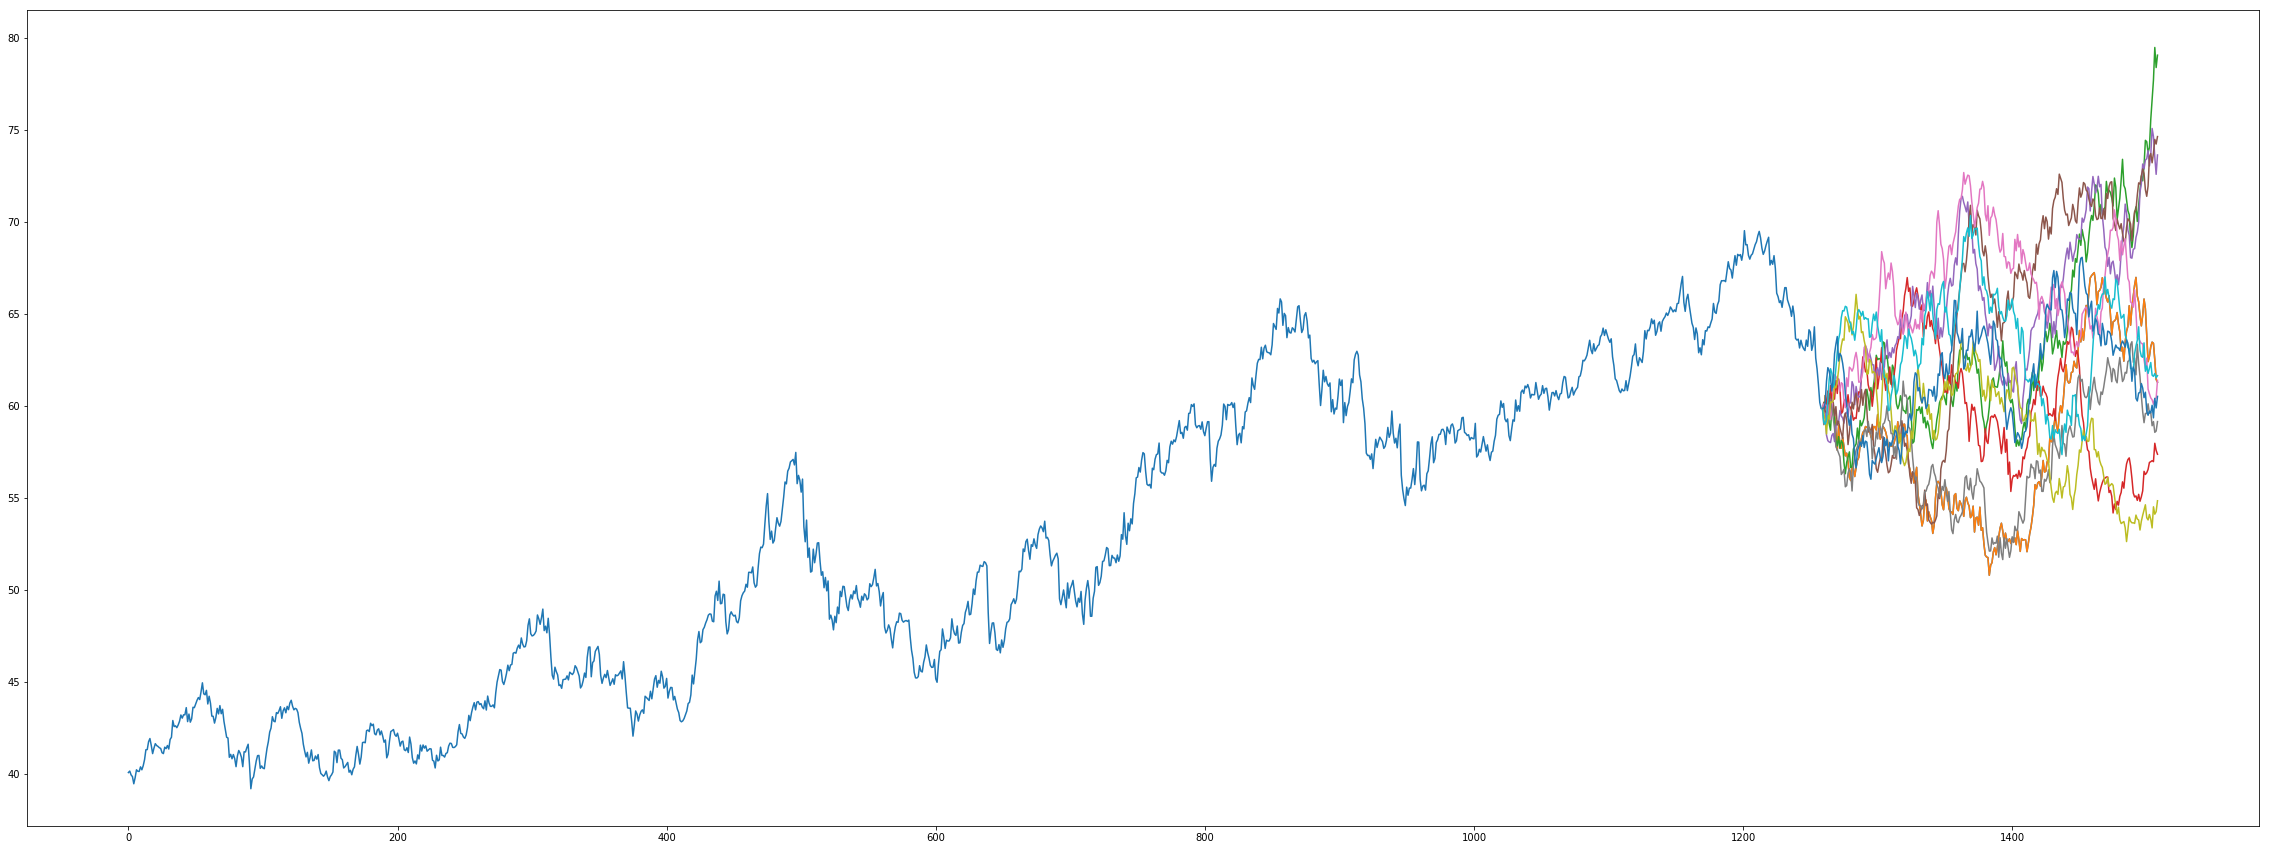

In [16]:
points = mc_forecast.iloc[:,:].values
plt.figure(figsize=(40,15))
plt.plot(points)
plt.show()

In [17]:
y = data.close.mean()
y

52.323339952343076

In [18]:
x = data.close.iloc[-250:].mean()
x

63.47165999999999

In [19]:
for i in range(forecast_count):
    z = price_list[i].mean()
    print(z)
    
# This demo observation proves the hypothesis.

# Hypothesis: If The mean (x) of the latest 250 points is less than the over all average (y) 
# then it is more likely for the mean (z) of the next 250 predicted points to be more than x.

# vice versa (this case), if the mean(x) of the latest 250 points is more than the over all average (y)
# then it is more likely for the mean (z) of the next 250 predicted points to be less than x.



58.287438612450494
63.43011939725277
59.882717073984
65.52662979921159
64.79039889465155
65.94476952255185
57.50627805460636
59.00766705916506
63.43633845269759
61.706476249153155


In [20]:
count = 0
if x>y:
    for i in range(forecast_count):
        z = price_list[i].mean()
        if z<x:
            count+=1
elif x<y:
    for i in range(forecast_count):
        z = price_list[i].mean()
        if z>x:
            count+=1
print("Hypothesis is true %d precent of the times" %(count/10*100))

# For accurate analysis of the hypothesis, we need to do the same for all the stocks.
# Program incomplete.

Hypothesis is true 70 precent of the times
